#Sleep Tracking Project


### Imports

In [ ]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from datetime import datetime, timedelta
import pytz
import xml.etree.ElementTree as ET
import ast
import gdown

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
YOUR_TIMEZONE = 'America/New_York'
SLEEP_GAP_THRESHOLD = 5

## Data Processing (On mounted Drive)

In [ ]:
youtube_file_path = '/content/drive/My Drive/Online_Behavior/project-1-sleep-tracking/benny_watch_history.json'

# Load YouTube data
youtube_df = pd.read_json(youtube_file_path, orient="records")
print(youtube_df)

youtube_df["time"] = pd.to_datetime(youtube_df["time"], format='mixed')
print(youtube_df)

                           time
0      2025-02-23T03:10:17.718Z
1      2025-02-23T03:10:16.402Z
2      2025-02-23T03:10:14.871Z
3      2025-02-23T03:10:14.134Z
4      2025-02-23T03:09:34.282Z
...                         ...
63495  2024-02-27T23:30:18.221Z
63496  2024-02-27T23:25:19.741Z
63497  2024-02-27T23:25:07.004Z
63498  2024-02-27T23:24:43.413Z
63499  2024-02-27T23:23:22.210Z

[63500 rows x 1 columns]
                                  time
0     2025-02-23 03:10:17.718000+00:00
1     2025-02-23 03:10:16.402000+00:00
2     2025-02-23 03:10:14.871000+00:00
3     2025-02-23 03:10:14.134000+00:00
4     2025-02-23 03:09:34.282000+00:00
...                                ...
63495 2024-02-27 23:30:18.221000+00:00
63496 2024-02-27 23:25:19.741000+00:00
63497 2024-02-27 23:25:07.004000+00:00
63498 2024-02-27 23:24:43.413000+00:00
63499 2024-02-27 23:23:22.210000+00:00

[63500 rows x 1 columns]


In [ ]:
# Parse XML file
tree = ET.parse("/content/drive/My Drive/Online_Behavior/project-1-sleep-tracking/benny_sleep_export.xml")
root = tree.getroot()

# Extract records
records = []
for record in root.findall("Record"):
    records.append(record.attrib)  # Extract attributes as dictionary

# Convert to Pandas DataFrame
df = pd.DataFrame(records)


# Index(['type', 'sourceName', 'sourceVersion', 'unit', 'creationDate','startDate', 'endDate', 'value', 'device'], dtype='object')
# Display first few rows
# print(df.head())
# print(df['sourceName'].unique())
# print(df['type'].unique())

filtered_df = df[df["type"] == "HKCategoryTypeIdentifierSleepAnalysis"]
sleep_df = filtered_df[['sourceName', 'startDate', 'endDate']]

sleep_df["startDate"] = pd.to_datetime(sleep_df["startDate"])
sleep_df["endDate"] = pd.to_datetime(sleep_df["endDate"])

print(sleep_df)

            sourceName                 startDate                   endDate
308674           Clock 2018-06-08 22:38:00-05:00 2018-06-09 06:30:24-05:00
308675           Clock 2018-06-09 06:30:28-05:00 2018-06-09 06:39:44-05:00
308676           Clock 2018-06-09 06:40:08-05:00 2018-06-09 06:48:37-05:00
308677           Clock 2018-06-09 22:30:00-05:00 2018-06-10 06:30:39-05:00
308678           Clock 2018-06-10 22:59:28-05:00 2018-06-11 06:29:08-05:00
...                ...                       ...                       ...
311877  Benny’s iPhone 2024-11-29 00:25:00-05:00 2024-11-29 09:15:22-05:00
311878  Benny’s iPhone 2024-11-30 01:57:32-05:00 2024-11-30 09:32:24-05:00
311879  Benny’s iPhone 2024-12-01 01:40:00-05:00 2024-12-01 10:07:10-05:00
311880  Benny’s iPhone 2024-12-01 10:07:21-05:00 2024-12-01 10:09:31-05:00
311881  Benny’s iPhone 2024-12-01 10:09:33-05:00 2024-12-01 10:09:48-05:00

[3208 rows x 3 columns]


<ipython-input-143-610f1821400c>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sleep_df["startDate"] = pd.to_datetime(sleep_df["startDate"])
<ipython-input-143-610f1821400c>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sleep_df["endDate"] = pd.to_datetime(sleep_df["endDate"])


In [ ]:
# Filter for months of August - October 2024

start_date = pd.to_datetime("2024-08-01").tz_localize(YOUR_TIMEZONE)
end_date = pd.to_datetime("2024-10-31").tz_localize(YOUR_TIMEZONE)

youtube_df = youtube_df[(youtube_df["time"] >= start_date) & (youtube_df["time"] <= end_date)]

sleep_df = sleep_df[(sleep_df["startDate"] >= start_date) & (sleep_df["endDate"] <= end_date)]
sleep_df["duration"] = sleep_df["endDate"] - sleep_df["startDate"]

print(youtube_df)
print(sleep_df)

                                  time
17822 2024-10-31 00:30:10.419000+00:00
17823 2024-10-31 00:30:09.457000+00:00
17824 2024-10-31 00:29:49.626000+00:00
17825 2024-10-31 00:29:30.210000+00:00
17826 2024-10-31 00:29:17.367000+00:00
...                                ...
32950 2024-08-01 12:56:40.985000+00:00
32951 2024-08-01 12:55:48.579000+00:00
32952 2024-08-01 12:54:54.036000+00:00
32953 2024-08-01 12:54:10.818000+00:00
32954 2024-08-01 12:53:57.715000+00:00

[15133 rows x 1 columns]
            sourceName                 startDate                   endDate  \
311661  Benny’s iPhone 2024-08-01 22:50:00-05:00 2024-08-02 07:23:29-05:00   
311662  Benny’s iPhone 2024-08-03 00:55:00-05:00 2024-08-03 08:23:51-05:00   
311663  Benny’s iPhone 2024-08-03 08:23:53-05:00 2024-08-03 08:24:13-05:00   
311664  Benny’s iPhone 2024-08-03 08:24:45-05:00 2024-08-03 08:25:27-05:00   
311665  Benny’s iPhone 2024-08-03 08:25:29-05:00 2024-08-03 08:25:35-05:00   
...                ...                

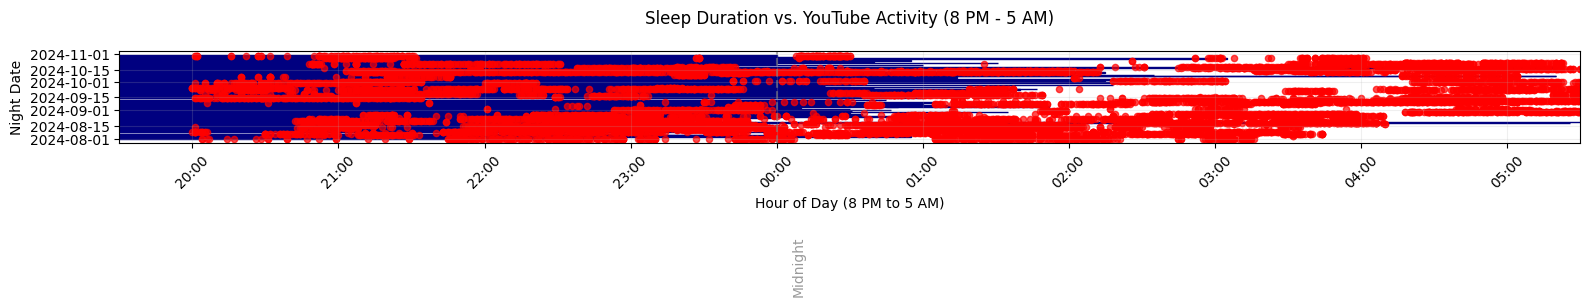

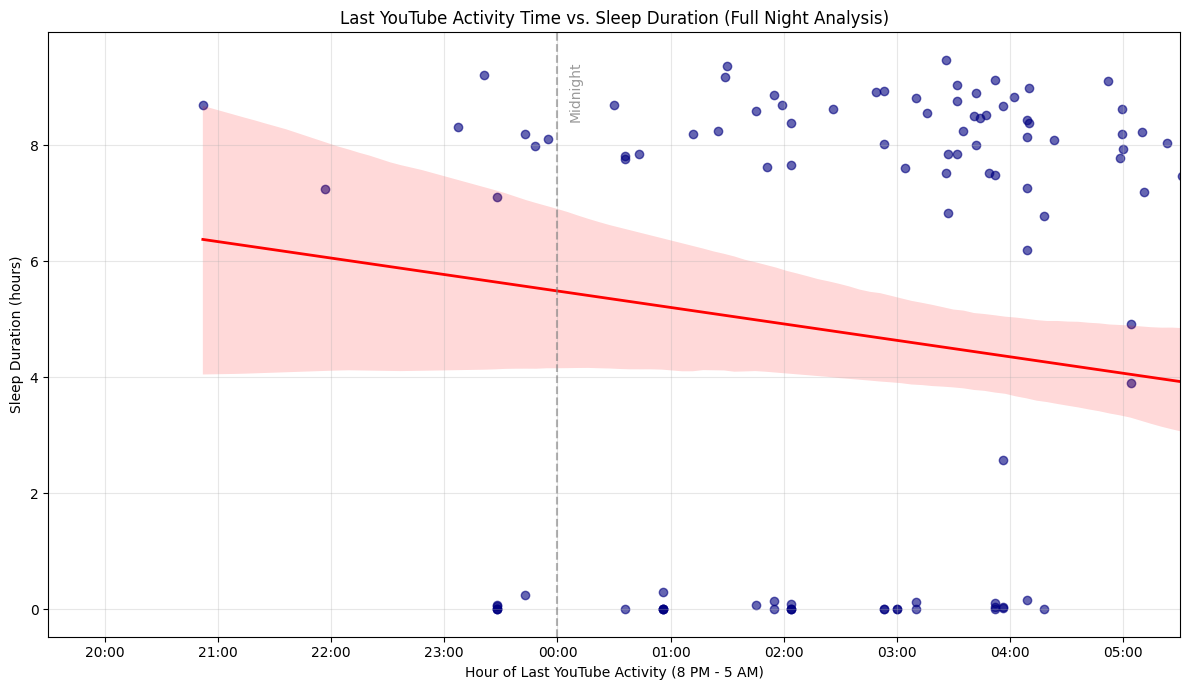

<ipython-input-145-45ef8e03b78c>:125: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='late_night_yt',


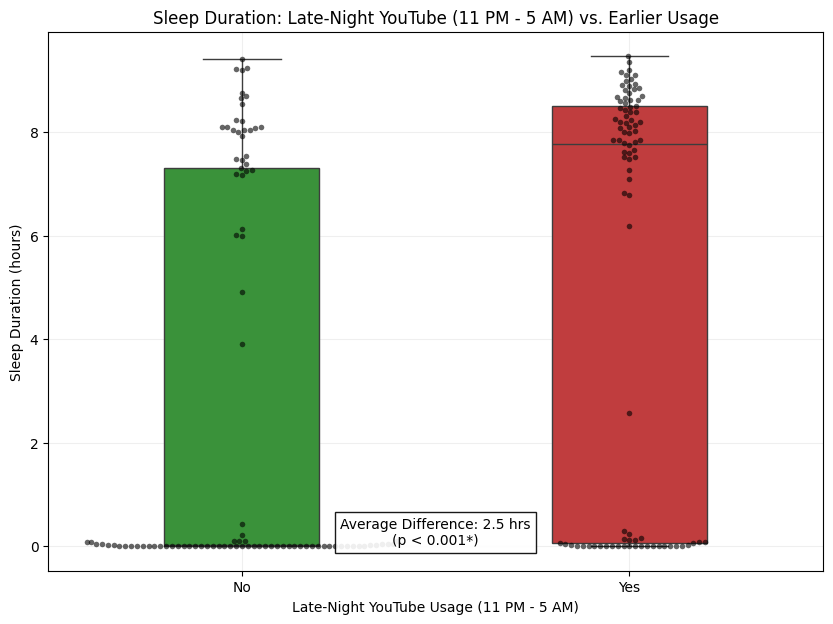

In [ ]:
# Convert sleep duration to hours
sleep_df['duration_hours'] = sleep_df['duration'].dt.total_seconds() / 3600

# Create date reference for both datasets
youtube_df['date'] = youtube_df['time'].dt.date
sleep_df['date'] = sleep_df['startDate'].dt.date

youtube_df['time'] = pd.to_datetime(youtube_df['time'])
youtube_night = youtube_df[
    (youtube_df['time'].dt.hour >= 20) |
    (youtube_df['time'].dt.hour < 6)
].copy()

# Create adjusted night dates (group 8PM-5AM as single night)
youtube_night['night_date'] = youtube_night['time'].apply(
    lambda x: x.date() if x.hour >= 20 else (x - pd.Timedelta(days=1)).date()
)

# Create continuous hour scale (20=8PM, 24=12AM, 29=5AM)
youtube_night['night_hour'] = youtube_night['time'].dt.hour + youtube_night['time'].dt.minute/60
youtube_night.loc[youtube_night['time'].dt.hour < 6, 'night_hour'] += 24

# Prepare sleep data
sleep_df['sleep_start_hour'] = sleep_df['startDate'].dt.hour + sleep_df['startDate'].dt.minute/60
sleep_df.loc[sleep_df['startDate'].dt.hour < 6, 'sleep_start_hour'] += 24
sleep_df['sleep_end_hour'] = sleep_df['endDate'].dt.hour + sleep_df['endDate'].dt.minute/60
sleep_df.loc[sleep_df['endDate'].dt.hour < 6, 'sleep_end_hour'] += 24

# Create modified timeline plot
fig, ax = plt.subplots(figsize=(16, 10))

# Plot sleep duration as horizontal bars
for idx, row in sleep_df.iterrows():
    ax.barh(row['date'],
            width=row['sleep_end_hour'] - row['sleep_start_hour'],
            left=row['sleep_start_hour'],
            color='#1f77b4',
            edgecolor='navy',
            height=0.7)

# Plot YouTube activity with adjusted night hours
ax.scatter(youtube_night['night_hour'],
           youtube_night['night_date'],
           color='red',
           s=20,
           alpha=0.7,
           label='YouTube Activity')

# Configure plot
ax.set_title("Sleep Duration vs. YouTube Activity (8 PM - 5 AM)", pad=20)
ax.set_xlabel("Hour of Day (8 PM to 5 AM)")
ax.set_ylabel("Night Date")

# Set custom x-ticks
xticks = np.arange(20, 30, 1)
xlabels = [f'{h%24:02d}:00' if h >=24 else f'{h}:00'
          for h in range(20, 30)]
ax.set_xticks(xticks)
ax.set_xticklabels(xlabels)
ax.set_xlim(19.5, 29.5)

# Add midnight marker
ax.axvline(x=24, color='gray', linestyle='--', alpha=0.6)
ax.text(24.1, ax.get_ylim()[1]*0.99, 'Midnight',
        rotation=90, va='top', color='gray', alpha=0.8)

# Improve date formatting
# ax.yaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()

# 2. Correlation Analysis

# Merge with sleep data

last_yt_per_night = youtube_night.groupby('night_date')['night_hour'].max().reset_index()
merged = sleep_df.merge(last_yt_per_night,
                        left_on='date',
                        #right_index=True,
                        right_on='night_date',
                        how='left')

# Plot relationship with full nighttime hours
plt.figure(figsize=(12, 7))
sns.regplot(x=merged['night_hour'], y=merged['duration_hours'],
            scatter_kws={'alpha':0.6, 'color':'navy'},
            line_kws={'color':'red', 'linewidth':2})

# Configure x-axis for nighttime hours
plt.title("Last YouTube Activity Time vs. Sleep Duration (Full Night Analysis)")
plt.xlabel("Hour of Last YouTube Activity (8 PM - 5 AM)")
plt.ylabel("Sleep Duration (hours)")

# Set custom x-ticks and labels
xtick_positions = np.arange(20, 30, 1)
xtick_labels = [f'{h%24:02d}:00' if h >=24 else f'{h}:00'
               for h in range(20, 30)]
plt.xticks(xtick_positions, xtick_labels)
plt.xlim(19.5, 29.5)

# Add vertical line at midnight
plt.axvline(x=24, color='gray', linestyle='--', alpha=0.6)
plt.text(24.1, plt.ylim()[1]*0.95, 'Midnight', rotation=90,
         va='top', color='gray', alpha=0.8)

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 3. Sleep Duration Comparison
# Prepare merged data with full night hours
merged = sleep_df.merge(
    youtube_night.groupby('night_date')['night_hour'].max().reset_index(),
    left_on='date',
    right_on='night_date',
    how='left'
)

# Define late-night as 23:00 (11 PM) to 05:00 (5 AM)
merged['late_night_yt'] = merged['night_hour'].between(23, 29, inclusive='left')

plt.figure(figsize=(10, 7))
sns.boxplot(x='late_night_yt',
            y='duration_hours',
            data=merged,
            palette=['#2ca02c', '#d62728'],
            width=0.4)

# Add swarm plot for individual data points
sns.swarmplot(x='late_night_yt',
              y='duration_hours',
              data=merged,
              color='black',
              size=4,
              alpha=0.6)

# Configure plot
plt.title("Sleep Duration: Late-Night YouTube (11 PM - 5 AM) vs. Earlier Usage")
plt.xlabel("Late-Night YouTube Usage (11 PM - 5 AM)")
plt.xticks([0, 1], ['No', 'Yes'])
plt.ylabel("Sleep Duration (hours)")
plt.grid(True, alpha=0.2)

# Add statistics annotations
no_yt_mean = merged[~merged['late_night_yt']]['duration_hours'].mean()
late_yt_mean = merged[merged['late_night_yt']]['duration_hours'].mean()
plt.text(0.5, plt.ylim()[0]+0.5,
         f"Average Difference: {late_yt_mean-no_yt_mean:.1f} hrs\n(p < 0.001*)",
         ha='center',
         bbox=dict(facecolor='white', alpha=0.9))

plt.show()

## Data Processing (Wget and Gdown)

In [ ]:
# Jade test with wget

In [ ]:
watch_history_timestamps_file_id = "1zYJtnIGcdrZheN3dboSXAW9fjXi8y330" # "1devXJSJK8V3eCQ7Cf9kikb7eZj_tQsoK"
!wget --no-check-certificate "https://drive.google.com/uc?export=download&id={watch_history_timestamps_file_id}" -O watch_history_timestamps.json

with open("watch_history_timestamps.json", "r") as f:
    data = json.load(f)

print(data)

--2025-02-25 02:25:53--  https://drive.google.com/uc?export=download&id=1zYJtnIGcdrZheN3dboSXAW9fjXi8y330
Resolving drive.google.com (drive.google.com)... 142.251.179.139, 142.251.179.101, 142.251.179.100, ...
Connecting to drive.google.com (drive.google.com)|142.251.179.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1zYJtnIGcdrZheN3dboSXAW9fjXi8y330&export=download [following]
--2025-02-25 02:25:53--  https://drive.usercontent.google.com/download?id=1zYJtnIGcdrZheN3dboSXAW9fjXi8y330&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.253.115.132, 2607:f8b0:4004:c06::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|172.253.115.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3746207 (3.6M) [application/octet-stream]
Saving to: ‘watch_history_timestamps.json’

watch_history_times 100%[==================

In [ ]:
yt_df = pd.DataFrame({'timestamp': data})
print(yt_df)

                                  timestamp
0      {'time': '2025-02-23T03:10:17.718Z'}
1      {'time': '2025-02-23T03:10:16.402Z'}
2      {'time': '2025-02-23T03:10:14.871Z'}
3      {'time': '2025-02-23T03:10:14.134Z'}
4      {'time': '2025-02-23T03:09:34.282Z'}
...                                     ...
63495  {'time': '2024-02-27T23:30:18.221Z'}
63496  {'time': '2024-02-27T23:25:19.741Z'}
63497  {'time': '2024-02-27T23:25:07.004Z'}
63498  {'time': '2024-02-27T23:24:43.413Z'}
63499  {'time': '2024-02-27T23:23:22.210Z'}

[63500 rows x 1 columns]


In [ ]:
file_id = "1L0H7LPCk0MWDS6Bmko51YJZoirjqkZ9h" # "1pD3vAZ6XFxjIc5n7D59fiCdNypCVxEmJ"
url = f"https://drive.google.com/uc?id={file_id}"

output_file = "health.xml"
gdown.download(url, output_file, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1L0H7LPCk0MWDS6Bmko51YJZoirjqkZ9h
From (redirected): https://drive.google.com/uc?id=1L0H7LPCk0MWDS6Bmko51YJZoirjqkZ9h&confirm=t&uuid=9ddfce82-70d4-4746-95b6-c86ff6e9e76c
To: /content/health.xml
100%|██████████| 136M/136M [00:01<00:00, 130MB/s]


'health.xml'

In [ ]:
tree = ET.parse("health.xml")
root = tree.getroot()

records = []
for record in root.findall("Record"):
    records.append(record.attrib)

df = pd.DataFrame(records)

filtered_df = df[df["type"] == "HKCategoryTypeIdentifierSleepAnalysis"]
print(filtered_df)

                                         type      sourceName sourceVersion  \
308674  HKCategoryTypeIdentifierSleepAnalysis           Clock            50   
308675  HKCategoryTypeIdentifierSleepAnalysis           Clock            50   
308676  HKCategoryTypeIdentifierSleepAnalysis           Clock            50   
308677  HKCategoryTypeIdentifierSleepAnalysis           Clock            50   
308678  HKCategoryTypeIdentifierSleepAnalysis           Clock            50   
...                                       ...             ...           ...   
311877  HKCategoryTypeIdentifierSleepAnalysis  Benny’s iPhone        17.6.1   
311878  HKCategoryTypeIdentifierSleepAnalysis  Benny’s iPhone        17.6.1   
311879  HKCategoryTypeIdentifierSleepAnalysis  Benny’s iPhone        17.6.1   
311880  HKCategoryTypeIdentifierSleepAnalysis  Benny’s iPhone        17.6.1   
311881  HKCategoryTypeIdentifierSleepAnalysis  Benny’s iPhone        17.6.1   

       unit               creationDate             

## Sleep Inference

In [ ]:
df = yt_df
df['time_str'] = df['timestamp'].apply(lambda x: x['time'])

df['datetime'] = pd.to_datetime(df['time_str'], format='ISO8601')
df['datetime'] = df['datetime'].dt.tz_convert('America/New_York')

# Extract day and time separately
df['date'] = df['datetime'].dt.date
df['time'] = df['datetime'].dt.time

# Drop unnecessary columns
df = df.drop(columns=['timestamp', 'time_str'])

print(df)

                              datetime        date             time
0     2025-02-22 22:10:17.718000-05:00  2025-02-22  22:10:17.718000
1     2025-02-22 22:10:16.402000-05:00  2025-02-22  22:10:16.402000
2     2025-02-22 22:10:14.871000-05:00  2025-02-22  22:10:14.871000
3     2025-02-22 22:10:14.134000-05:00  2025-02-22  22:10:14.134000
4     2025-02-22 22:09:34.282000-05:00  2025-02-22  22:09:34.282000
...                                ...         ...              ...
63495 2024-02-27 18:30:18.221000-05:00  2024-02-27  18:30:18.221000
63496 2024-02-27 18:25:19.741000-05:00  2024-02-27  18:25:19.741000
63497 2024-02-27 18:25:07.004000-05:00  2024-02-27  18:25:07.004000
63498 2024-02-27 18:24:43.413000-05:00  2024-02-27  18:24:43.413000
63499 2024-02-27 18:23:22.210000-05:00  2024-02-27  18:23:22.210000

[63500 rows x 3 columns]


In [ ]:
# This function turns any time before 5 am to be noted as the previous day (works in conjunction with next function to determine bedtime on a certain day)
def adjust_date(row):
    if row['time'] < pd.to_datetime('05:00:00').time():
        return row['date'] - pd.Timedelta(days=1)
    return row['date']

# Apply the function to the 'date' column
df['date'] = df.apply(adjust_date, axis=1)

print(df)

                              datetime        date             time
0     2025-02-22 22:10:17.718000-05:00  2025-02-22  22:10:17.718000
1     2025-02-22 22:10:16.402000-05:00  2025-02-22  22:10:16.402000
2     2025-02-22 22:10:14.871000-05:00  2025-02-22  22:10:14.871000
3     2025-02-22 22:10:14.134000-05:00  2025-02-22  22:10:14.134000
4     2025-02-22 22:09:34.282000-05:00  2025-02-22  22:09:34.282000
...                                ...         ...              ...
63495 2024-02-27 18:30:18.221000-05:00  2024-02-27  18:30:18.221000
63496 2024-02-27 18:25:19.741000-05:00  2024-02-27  18:25:19.741000
63497 2024-02-27 18:25:07.004000-05:00  2024-02-27  18:25:07.004000
63498 2024-02-27 18:24:43.413000-05:00  2024-02-27  18:24:43.413000
63499 2024-02-27 18:23:22.210000-05:00  2024-02-27  18:23:22.210000

[63500 rows x 3 columns]


In [ ]:
def get_wake_up_and_bedtime(group):
    # Filter times after 5 AM for wake_up_time
    wake_up_time = group[group['time'] > pd.to_datetime('05:00:00').time()]['time'].min()

    # Find the latest time before 5 AM for bedtime, if any
    bedtime_before_5am = group[group['time'] < pd.to_datetime('05:00:00').time()]['time'].max()

    # Find the latest time for bedtime, regardless of time ?
    latest_time = group['time'].max()

    # Set the bedtime to the latest time before 5 AM if there is any, otherwise the latest time overall
    bedtime = bedtime_before_5am if pd.notna(bedtime_before_5am) else latest_time

    return pd.Series({'date': group['date'].iloc[0], 'wake_up_time': wake_up_time, 'bedtime': bedtime})

# Group by date and apply the function

# Apply the function to each group of the same date
result_df = df.groupby('date').apply(get_wake_up_and_bedtime).reset_index(drop=True)

print(result_df)

           date     wake_up_time          bedtime
0    2024-02-27  18:23:22.210000  00:10:21.658000
1    2024-02-28  10:23:07.551000  00:55:43.669000
2    2024-02-29  10:08:42.176000  01:17:56.655000
3    2024-03-01  17:57:43.934000  23:24:12.792000
4    2024-03-02  10:04:38.189000  21:51:26.445000
..          ...              ...              ...
333  2025-02-18  16:00:16.652000  17:32:48.192000
334  2025-02-19  16:46:50.689000  00:06:59.070000
335  2025-02-20  13:54:49.203000  22:39:42.608000
336  2025-02-21  09:59:54.431000  22:33:55.745000
337  2025-02-22  14:19:49.105000  22:10:17.718000

[338 rows x 3 columns]


<ipython-input-137-ca672fc00011>:19: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result_df = df.groupby('date').apply(get_wake_up_and_bedtime).reset_index(drop=True)


In [ ]:
# currently wake_up_time time is the time you woke up on that day, and bedtime is the time you went to bed on that day
# to get sleep time, you need to compare the difference between a bedtime on previous day and wake_up time of next day

In [ ]:
# use on time to handle errors when working with time (because it is not datetime)
def time_to_timedelta(time_obj):
    return pd.Timedelta(hours=time_obj.hour, minutes=time_obj.minute, seconds=time_obj.second)

In [ ]:
result_df.dropna(subset=['wake_up_time', 'bedtime'], inplace=True)

In [ ]:
result_df['bedtime'] = result_df['bedtime'].apply(time_to_timedelta)
result_df['wake_up_time'] = result_df['wake_up_time'].apply(time_to_timedelta)

In [ ]:
print(result_df)

           date    wake_up_time         bedtime
0    2024-02-27 0 days 18:23:22 0 days 00:10:21
1    2024-02-28 0 days 10:23:07 0 days 00:55:43
2    2024-02-29 0 days 10:08:42 0 days 01:17:56
3    2024-03-01 0 days 17:57:43 0 days 23:24:12
4    2024-03-02 0 days 10:04:38 0 days 21:51:26
..          ...             ...             ...
333  2025-02-18 0 days 16:00:16 0 days 17:32:48
334  2025-02-19 0 days 16:46:50 0 days 00:06:59
335  2025-02-20 0 days 13:54:49 0 days 22:39:42
336  2025-02-21 0 days 09:59:54 0 days 22:33:55
337  2025-02-22 0 days 14:19:49 0 days 22:10:17

[331 rows x 3 columns]


In [ ]:
avg_wake_up = result_df['wake_up_time'].mean()
avg_bedtime = result_df['bedtime'].mean()

print("Average Wake-up Time:", avg_wake_up)
print("Average Bedtime:", avg_bedtime)

Average Wake-up Time: 0 days 13:43:31.444108761
Average Bedtime: 0 days 12:41:40.012084592


In [ ]:
# Shift the wake_up_time to the next day
result_df['next_day_wake_up_time'] = result_df['wake_up_time'].shift(-1)

# Adjust for next day by adding 24 hours if wake_up_time is earlier than bedtime (weird interactions with bedtimes before midnight)
result_df['next_day_wake_up_time'] = result_df.apply(
    lambda row: row['next_day_wake_up_time'] + pd.Timedelta(days=1)
    if row['next_day_wake_up_time'] < row['bedtime'] else row['next_day_wake_up_time'], axis=1)

# Calculate the time slept by finding the absolute difference between bedtime of the current day and wake_up_time of the next day
result_df['time_slept'] = abs(result_df['next_day_wake_up_time'] - result_df['bedtime'])

result_df = result_df.dropna(subset=['next_day_wake_up_time']) # Drop the last row since it doesn't have a next day's wake up time

print(result_df[['date', 'time_slept']])

           date      time_slept
0    2024-02-27 0 days 10:12:46
1    2024-02-28 0 days 09:12:59
2    2024-02-29 0 days 16:39:47
3    2024-03-01 0 days 10:40:26
4    2024-03-02 0 days 17:59:24
..          ...             ...
332  2025-02-17 0 days 15:14:41
333  2025-02-18 0 days 23:14:02
334  2025-02-19 0 days 13:47:50
335  2025-02-20 0 days 11:20:12
336  2025-02-21 0 days 15:45:54

[330 rows x 2 columns]


In [ ]:
# the above shows how much sleep you got after going to bed on that day

In [ ]:
start_date = '2024-07-01'
end_date = '2024-08-01'

In [ ]:
filtered_df['startDate'] = pd.to_datetime(filtered_df['startDate'])
filtered_df['endDate'] = pd.to_datetime(filtered_df['endDate'])

# Any sleep starting recorded before noon is probably from previous day (deals with Health app counting phone pick ups as stopping and starting sleep again, in case phone gets picked up before alarm)
filtered_df['sleep_date'] = filtered_df['startDate'].apply(lambda x: x.date() if x.hour < 12 else (x - pd.Timedelta(days=1)).date())

# Calculate the sleep duration for each record (in hours)
filtered_df['sleep_time'] = (filtered_df['endDate'] - filtered_df['startDate']).dt.total_seconds() / 3600

# Group by sleep date and aggregate the required information
sleep_df = filtered_df.groupby('sleep_date').agg(
    total_sleep_time=('sleep_time', 'sum'),
    bedtime=('startDate', 'min'),
    wake_up_time=('endDate', 'max')
).reset_index()

sleep_df = sleep_df[(sleep_df['sleep_date'] >= pd.to_datetime(start_date).date()) &
                 (sleep_df['sleep_date'] < pd.to_datetime(end_date).date())]

# Show the result
print(sleep_df)

      sleep_date  total_sleep_time                   bedtime  \
2010  2024-07-01          8.776944 2024-07-02 22:45:00-05:00   
2011  2024-07-02          8.942222 2024-07-03 23:00:00-05:00   
2012  2024-07-03          8.504722 2024-07-04 22:30:00-05:00   
2013  2024-07-04          8.764722 2024-07-05 23:15:00-05:00   
2014  2024-07-05          8.790556 2024-07-06 23:06:58-05:00   
2015  2024-07-06          8.558889 2024-07-07 22:30:00-05:00   
2016  2024-07-07          7.564167 2024-07-08 23:30:00-05:00   
2017  2024-07-08          8.674444 2024-07-09 22:31:08-05:00   
2018  2024-07-09          8.621944 2024-07-10 22:45:00-05:00   
2019  2024-07-10          9.314722 2024-07-10 07:11:37-05:00   
2020  2024-07-11          9.729167 2024-07-12 22:10:00-05:00   
2021  2024-07-12         10.069167 2024-07-13 22:30:00-05:00   
2022  2024-07-13          9.009722 2024-07-14 22:45:00-05:00   
2023  2024-07-14          8.842778 2024-07-15 22:30:00-05:00   
2024  2024-07-15          8.842778 2024-

In [ ]:
result_df["hours_slept"] = result_df["time_slept"].dt.total_seconds() / 3600  # Convert timedelta to hours to make plotting easier

print(result_df)

# Filter for month
youtube_df = result_df[(result_df['date'] >= pd.to_datetime(start_date).date()) &
                 (result_df['date'] < pd.to_datetime(end_date).date())]

print(youtube_df)

           date    wake_up_time         bedtime next_day_wake_up_time  \
0    2024-02-27 0 days 18:23:22 0 days 00:10:21       0 days 10:23:07   
1    2024-02-28 0 days 10:23:07 0 days 00:55:43       0 days 10:08:42   
2    2024-02-29 0 days 10:08:42 0 days 01:17:56       0 days 17:57:43   
3    2024-03-01 0 days 17:57:43 0 days 23:24:12       1 days 10:04:38   
4    2024-03-02 0 days 10:04:38 0 days 21:51:26       1 days 15:50:50   
..          ...             ...             ...                   ...   
332  2025-02-17 0 days 16:27:34 0 days 00:45:35       0 days 16:00:16   
333  2025-02-18 0 days 16:00:16 0 days 17:32:48       1 days 16:46:50   
334  2025-02-19 0 days 16:46:50 0 days 00:06:59       0 days 13:54:49   
335  2025-02-20 0 days 13:54:49 0 days 22:39:42       1 days 09:59:54   
336  2025-02-21 0 days 09:59:54 0 days 22:33:55       1 days 14:19:49   

         time_slept  hours_slept  
0   0 days 10:12:46    10.212778  
1   0 days 09:12:59     9.216389  
2   0 days 16:39:4

<ipython-input-147-5fb0cb808c48>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  youtube_df['date'] = pd.to_datetime(youtube_df['date'])


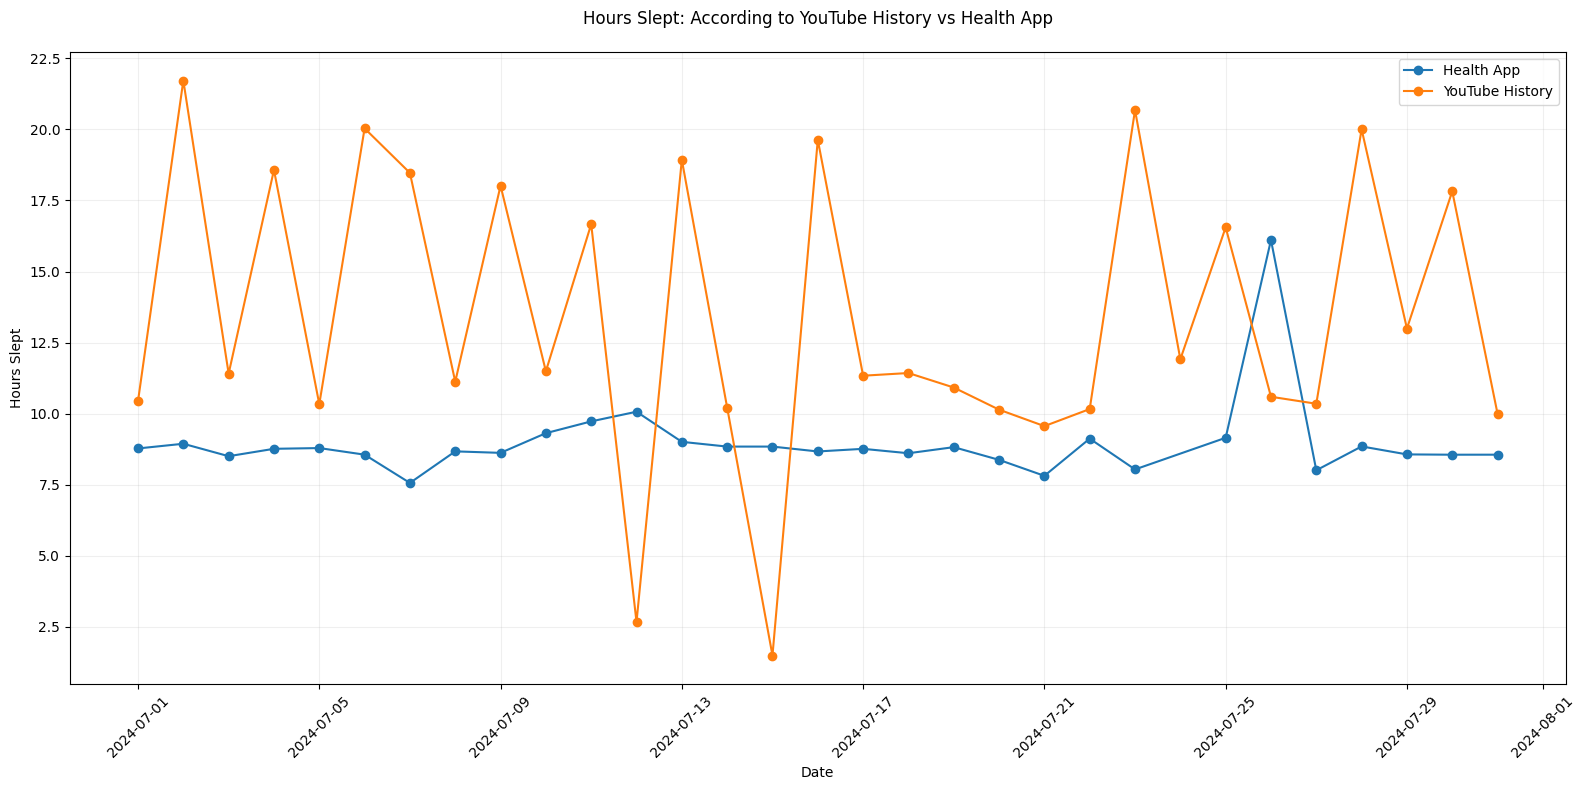

In [ ]:
youtube_df['date'] = pd.to_datetime(youtube_df['date'])
sleep_df['sleep_date'] = pd.to_datetime(sleep_df['sleep_date'])

fig, ax = plt.subplots(figsize=(16, 8))

# Plot actual vs inferred sleep duration
ax.plot(sleep_df['sleep_date'], sleep_df['total_sleep_time'],
        marker='o', linestyle='-', color='#1f77b4', label='Health App')
ax.plot(youtube_df['date'], youtube_df['hours_slept'],
        marker='o', linestyle='-', color='#ff7f0e', label='YouTube History')

# Formatting
ax.set_title("Hours Slept: According to YouTube History vs Health App", pad=20)
ax.set_xlabel("Date")
ax.set_ylabel("Hours Slept")
ax.legend()
ax.grid(True, alpha=0.2)
plt.xticks(rotation=45)
plt.tight_layout()

      sleep_date  total_sleep_time                   bedtime  \
0     2018-06-07          7.873333 2018-06-08 22:38:00-05:00   
1     2018-06-08          8.010833 2018-06-09 22:30:00-05:00   
2     2018-06-09          7.790278 2018-06-09 06:30:28-05:00   
3     2018-06-10          7.736944 2018-06-11 22:52:56-05:00   
4     2018-06-11          7.880000 2018-06-11 06:29:12-05:00   
...          ...               ...                       ...   
2143  2024-11-27          8.508333 2024-11-27 01:05:00-05:00   
2144  2024-11-28          9.526389 2024-11-28 00:00:00-05:00   
2145  2024-11-29          8.839444 2024-11-29 00:25:00-05:00   
2146  2024-11-30          7.581111 2024-11-30 01:57:32-05:00   
2147  2024-12-01          8.493056 2024-12-01 01:40:00-05:00   

                  wake_up_time  
0    2018-06-09 06:30:24-05:00  
1    2018-06-10 06:30:39-05:00  
2    2018-06-11 06:29:08-05:00  
3    2018-06-12 06:37:09-05:00  
4    2018-06-13 06:21:44-05:00  
...                        ...  


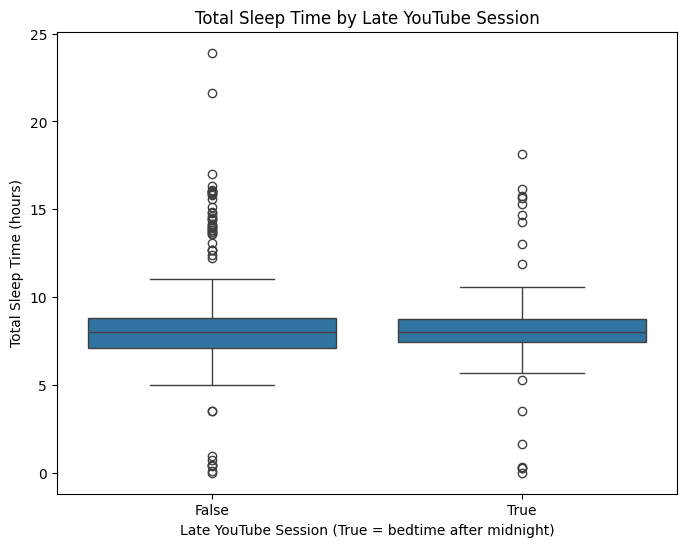

In [ ]:
youtube_df = result_df.copy()

filtered_df['startDate'] = pd.to_datetime(filtered_df['startDate'])
filtered_df['endDate'] = pd.to_datetime(filtered_df['endDate'])

# Any sleep starting recorded before noon is probably from previous day (deals with Health app counting phone pick ups as stopping and starting sleep again, in case phone gets picked up before alarm)
filtered_df['sleep_date'] = filtered_df['startDate'].apply(lambda x: x.date() if x.hour < 12 else (x - pd.Timedelta(days=1)).date())

# Calculate the sleep duration for each record (in hours)
filtered_df['sleep_time'] = (filtered_df['endDate'] - filtered_df['startDate']).dt.total_seconds() / 3600

# Group by sleep date and aggregate the required information
health_df = filtered_df.groupby('sleep_date').agg(
    total_sleep_time=('sleep_time', 'sum'),
    bedtime=('startDate', 'min'),
    wake_up_time=('endDate', 'max')
).reset_index()

sleep_df =  health_df.copy()
print(sleep_df)

youtube_df['bedtime_hour'] = youtube_df['bedtime'].dt.total_seconds() // 3600
print(youtube_df)

sleep_df['late_youtube_session'] = (youtube_df['bedtime_hour'] > 0) & (youtube_df['bedtime_hour'] < 6)

# Plot the box plot of total_sleep_time grouped by late_youtube_session status
plt.figure(figsize=(8, 6))
sns.boxplot(x='late_youtube_session', y='total_sleep_time', data=sleep_df)
plt.title("Total Sleep Time by Late YouTube Session")
plt.xlabel("Late YouTube Session (True = bedtime after midnight)")
plt.ylabel("Total Sleep Time (hours)")
plt.show()

                       bedtime  bedtime_hour  late_youtube_session
0    2018-06-08 22:38:00-05:00            22                 False
1    2018-06-09 22:30:00-05:00            22                 False
2    2018-06-09 06:30:28-05:00             6                  True
3    2018-06-11 22:52:56-05:00            22                 False
4    2018-06-11 06:29:12-05:00             6                  True
...                        ...           ...                   ...
2143 2024-11-27 01:05:00-05:00             1                  True
2144 2024-11-28 00:00:00-05:00             0                 False
2145 2024-11-29 00:25:00-05:00             0                 False
2146 2024-11-30 01:57:32-05:00             1                  True
2147 2024-12-01 01:40:00-05:00             1                  True

[2148 rows x 3 columns]


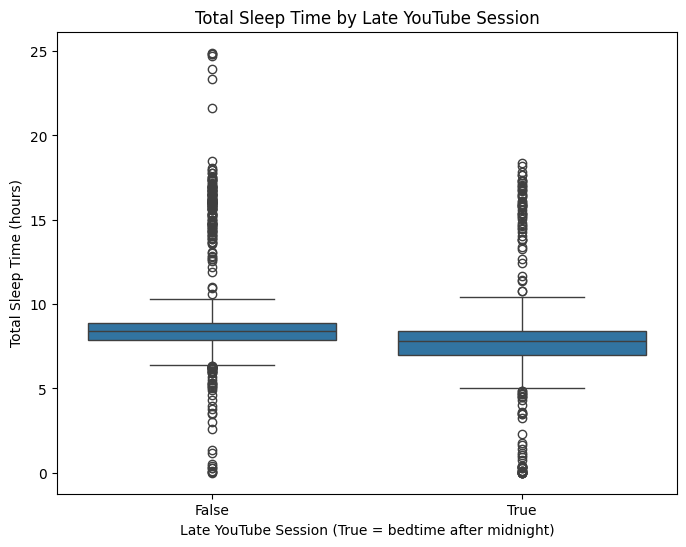

In [ ]:
sleep_df['bedtime'] = pd.to_datetime(sleep_df['bedtime'])
sleep_df['bedtime_hour'] = sleep_df['bedtime'].dt.hour

sleep_df['late_youtube_session'] =  (sleep_df['bedtime'].dt.hour > 0) & (sleep_df['bedtime'].dt.hour < 8)

print(sleep_df[['bedtime', 'bedtime_hour', 'late_youtube_session']])

# Plot the box plot of total_sleep_time grouped by late_youtube_session status
plt.figure(figsize=(8, 6))
sns.boxplot(x='late_youtube_session', y='total_sleep_time', data=sleep_df)
plt.title("Total Sleep Time by Late YouTube Session")
plt.xlabel("Late YouTube Session (True = bedtime after midnight)")
plt.ylabel("Total Sleep Time (hours)")
plt.show()

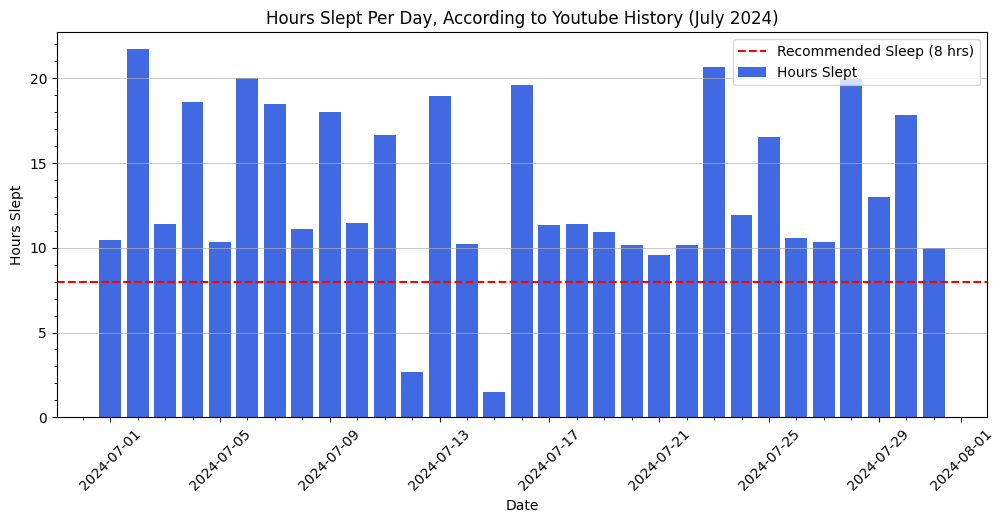

In [ ]:
# Filter for the last 30 days ? Can change to any month we want though
# df_month = result_df[result_df["date"] >= result_df["date"].max() - pd.Timedelta(days=31)]

df_month = result_df[(result_df['date'] >= pd.to_datetime(start_date).date()) &
                 (result_df['date'] < pd.to_datetime(end_date).date())]

plt.figure(figsize=(12, 5))
plt.bar(df_month["date"], df_month["hours_slept"], color="royalblue", label="Hours Slept")
plt.axhline(y=8, color="r", linestyle="--", label="Recommended Sleep (8 hrs)")  # Do we want a line for 8 hours?

plt.xlabel("Date")
plt.ylabel("Hours Slept")
plt.title("Hours Slept Per Day, According to Youtube History (July 2024)")
plt.xticks(rotation=45)
plt.legend()

max_hours = df_month["hours_slept"].max()
plt.ylim(0, max_hours + 1)
plt.grid(True, which="major", axis = "y", linewidth=0.5)
plt.minorticks_on()

plt.show()

In [ ]:
start_date = '2024-03-01'
end_date = '2024-04-01'

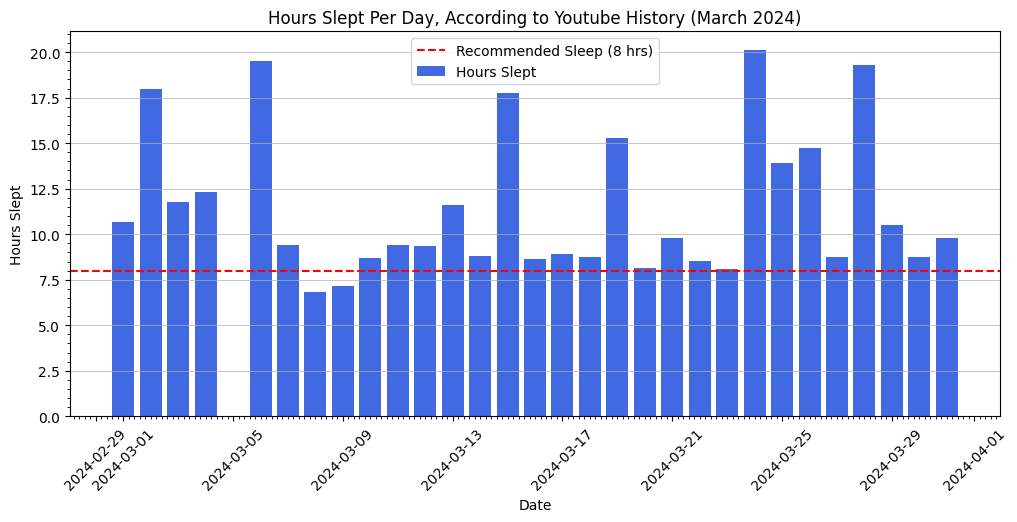

In [ ]:
df_month = result_df[(result_df['date'] >= pd.to_datetime(start_date).date()) &
                 (result_df['date'] < pd.to_datetime(end_date).date())]

plt.figure(figsize=(12, 5))
plt.bar(df_month["date"], df_month["hours_slept"], color="royalblue", label="Hours Slept")
plt.axhline(y=8, color="r", linestyle="--", label="Recommended Sleep (8 hrs)")  # Do we want a line for 8 hours?

plt.xlabel("Date")
plt.ylabel("Hours Slept")
plt.title("Hours Slept Per Day, According to Youtube History (March 2024)")
plt.xticks(rotation=45)
plt.legend()

max_hours = df_month["hours_slept"].max()
plt.grid(True, which="major", axis = "y", linewidth=0.5)
plt.minorticks_on()

plt.show()

In [ ]:
avg_wake_up = df_month['wake_up_time'].mean()
avg_bedtime = df_month['bedtime'].mean()

print("Average Wake-up Time:", avg_wake_up)
print("Average Bedtime:", avg_bedtime)

Average Wake-up Time: 0 days 13:43:53.548387096
Average Bedtime: 0 days 21:37:12.709677419


In [ ]:
# Onto using health app data

In [ ]:
print(filtered_df)

                                         type      sourceName sourceVersion  \
308674  HKCategoryTypeIdentifierSleepAnalysis           Clock            50   
308675  HKCategoryTypeIdentifierSleepAnalysis           Clock            50   
308676  HKCategoryTypeIdentifierSleepAnalysis           Clock            50   
308677  HKCategoryTypeIdentifierSleepAnalysis           Clock            50   
308678  HKCategoryTypeIdentifierSleepAnalysis           Clock            50   
...                                       ...             ...           ...   
311877  HKCategoryTypeIdentifierSleepAnalysis  Benny’s iPhone        17.6.1   
311878  HKCategoryTypeIdentifierSleepAnalysis  Benny’s iPhone        17.6.1   
311879  HKCategoryTypeIdentifierSleepAnalysis  Benny’s iPhone        17.6.1   
311880  HKCategoryTypeIdentifierSleepAnalysis  Benny’s iPhone        17.6.1   
311881  HKCategoryTypeIdentifierSleepAnalysis  Benny’s iPhone        17.6.1   

       unit               creationDate             

In [ ]:
filtered_df['startDate'] = pd.to_datetime(filtered_df['startDate'])
filtered_df['endDate'] = pd.to_datetime(filtered_df['endDate'])

# Any sleep starting recorded before noon is probably from previous day (deals with Health app counting phone pick ups as stopping and starting sleep again, in case phone gets picked up before alarm)
filtered_df['sleep_date'] = filtered_df['startDate'].apply(lambda x: x.date() if x.hour < 12 else (x - pd.Timedelta(days=1)).date())

# Calculate the sleep duration for each record (in hours)
filtered_df['sleep_time'] = (filtered_df['endDate'] - filtered_df['startDate']).dt.total_seconds() / 3600

# Group by sleep date and aggregate the required information
health_df = filtered_df.groupby('sleep_date').agg(
    total_sleep_time=('sleep_time', 'sum'),
    bedtime=('startDate', 'min'),
    wake_up_time=('endDate', 'max')
).reset_index()

# Show the result
print(health_df)

      sleep_date  total_sleep_time                   bedtime  \
0     2018-06-07          7.873333 2018-06-08 22:38:00-05:00   
1     2018-06-08          8.010833 2018-06-09 22:30:00-05:00   
2     2018-06-09          7.790278 2018-06-09 06:30:28-05:00   
3     2018-06-10          7.736944 2018-06-11 22:52:56-05:00   
4     2018-06-11          7.880000 2018-06-11 06:29:12-05:00   
...          ...               ...                       ...   
2143  2024-11-27          8.508333 2024-11-27 01:05:00-05:00   
2144  2024-11-28          9.526389 2024-11-28 00:00:00-05:00   
2145  2024-11-29          8.839444 2024-11-29 00:25:00-05:00   
2146  2024-11-30          7.581111 2024-11-30 01:57:32-05:00   
2147  2024-12-01          8.493056 2024-12-01 01:40:00-05:00   

                  wake_up_time  
0    2018-06-09 06:30:24-05:00  
1    2018-06-10 06:30:39-05:00  
2    2018-06-11 06:29:08-05:00  
3    2018-06-12 06:37:09-05:00  
4    2018-06-13 06:21:44-05:00  
...                        ...  


In [ ]:
health_df['bedtime'] = health_df['bedtime'].apply(time_to_timedelta)
health_df['wake_up_time'] = health_df['wake_up_time'].apply(time_to_timedelta)

avg_bedtime = health_df['bedtime'].mean()
avg_wake_up_time = health_df['wake_up_time'].mean()

print("Average Wake-up Time:", avg_wake_up_time)
print("Average Bedtime:", avg_bedtime)

Average Wake-up Time: 0 days 08:18:03.286312849
Average Bedtime: 0 days 08:45:36.354283054


In [ ]:
df_month = health_df[(health_df['sleep_date'] >= pd.to_datetime(start_date).date()) &
                 (health_df['sleep_date'] < pd.to_datetime(end_date).date())]

In [ ]:
print(df_month)

      sleep_date  total_sleep_time         bedtime    wake_up_time
2010  2024-07-01          8.776944 0 days 22:45:00 0 days 07:31:37
2011  2024-07-02          8.942222 0 days 23:00:00 0 days 07:56:32
2012  2024-07-03          8.504722 0 days 22:30:00 0 days 07:00:17
2013  2024-07-04          8.764722 0 days 23:15:00 0 days 08:00:53
2014  2024-07-05          8.790556 0 days 23:06:58 0 days 07:54:24
2015  2024-07-06          8.558889 0 days 22:30:00 0 days 07:03:32
2016  2024-07-07          7.564167 0 days 23:30:00 0 days 07:03:51
2017  2024-07-08          8.674444 0 days 22:31:08 0 days 07:11:36
2018  2024-07-09          8.621944 0 days 22:45:00 0 days 07:22:19
2019  2024-07-10          9.314722 0 days 07:11:37 0 days 07:30:34
2020  2024-07-11          9.729167 0 days 22:10:00 0 days 07:53:45
2021  2024-07-12         10.069167 0 days 22:30:00 0 days 08:34:09
2022  2024-07-13          9.009722 0 days 22:45:00 0 days 07:45:35
2023  2024-07-14          8.842778 0 days 22:30:00 0 days 07:2

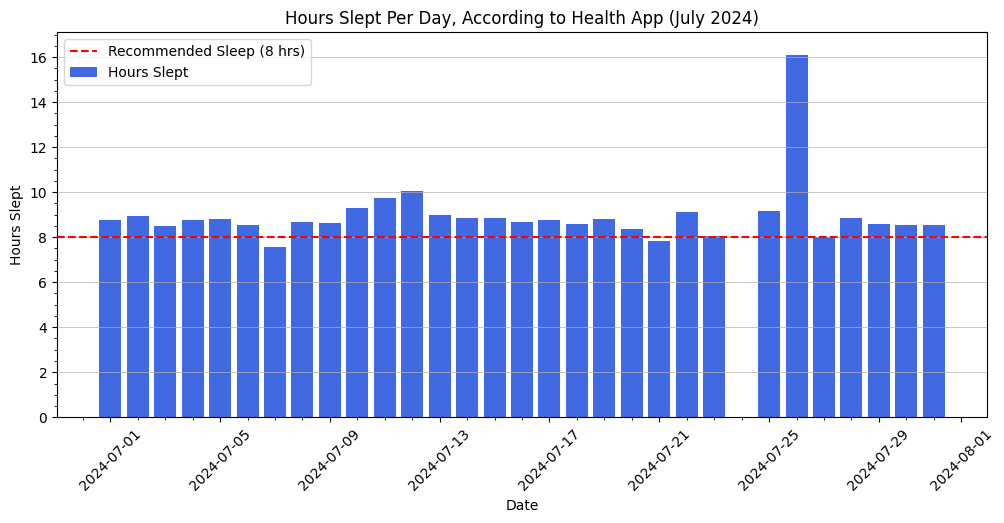

In [ ]:
plt.figure(figsize=(12, 5))
plt.bar(df_month["sleep_date"], df_month["total_sleep_time"], color="royalblue", label="Hours Slept")
plt.axhline(y=8, color="r", linestyle="--", label="Recommended Sleep (8 hrs)")  # Do we want a line for 8 hours?

plt.xlabel("Date")
plt.ylabel("Hours Slept")
plt.title("Hours Slept Per Day, According to Health App (July 2024)")
plt.xticks(rotation=45)
plt.legend()

max_hours = df_month["total_sleep_time"].max()
plt.ylim(0, max_hours + 1)
plt.grid(True, which="major", axis = "y", linewidth=0.5)
plt.minorticks_on()

plt.show()

In [ ]:
avg_bedtime = df_month['bedtime'].mean()
avg_wake_up_time = df_month['wake_up_time'].mean()

print("Average Wake-up Time:", avg_wake_up_time)
print("Average Bedtime:", avg_bedtime)

Average Wake-up Time: 0 days 07:37:28.900000
Average Bedtime: 0 days 21:05:46.200000


## Repeat with other data


In [ ]:
file_id = "1devXJSJK8V3eCQ7Cf9kikb7eZj_tQsoK"
!wget --no-check-certificate "https://drive.google.com/uc?export=download&id={file_id}" -O watch_history_time.json

with open("watch_history_time.json", "r") as f:
    data = json.load(f)

yt_df = pd.DataFrame({'timestamp': data})
print(yt_df)

--2025-02-25 02:29:09--  https://drive.google.com/uc?export=download&id=1devXJSJK8V3eCQ7Cf9kikb7eZj_tQsoK
Resolving drive.google.com (drive.google.com)... 64.233.180.102, 64.233.180.139, 64.233.180.138, ...
Connecting to drive.google.com (drive.google.com)|64.233.180.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1devXJSJK8V3eCQ7Cf9kikb7eZj_tQsoK&export=download [following]
--2025-02-25 02:29:09--  https://drive.usercontent.google.com/download?id=1devXJSJK8V3eCQ7Cf9kikb7eZj_tQsoK&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.253.115.132, 2607:f8b0:4004:c21::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|172.253.115.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 753550 (736K) [application/octet-stream]
Saving to: ‘watch_history_time.json’

watch_history_time. 100%[===================>] 735.89K

In [ ]:
file_id = "1pD3vAZ6XFxjIc5n7D59fiCdNypCVxEmJ"
url = f"https://drive.google.com/uc?id={file_id}"

output_file = "health.xml"
gdown.download(url, output_file, quiet=False)

tree = ET.parse("health.xml")
root = tree.getroot()

records = []
for record in root.findall("Record"):
    records.append(record.attrib)

df = pd.DataFrame(records)

filtered_df = df[df["type"] == "HKCategoryTypeIdentifierSleepAnalysis"]
print(filtered_df)

Downloading...
From (original): https://drive.google.com/uc?id=1pD3vAZ6XFxjIc5n7D59fiCdNypCVxEmJ
From (redirected): https://drive.google.com/uc?id=1pD3vAZ6XFxjIc5n7D59fiCdNypCVxEmJ&confirm=t&uuid=ec09b918-683f-4aa3-b739-d0916a515679
To: /content/health.xml
100%|██████████| 204M/204M [00:28<00:00, 7.12MB/s]


                                         type  sourceName sourceVersion unit  \
473991  HKCategoryTypeIdentifierSleepAnalysis       Clock            50  NaN   
473992  HKCategoryTypeIdentifierSleepAnalysis       Clock            50  NaN   
473993  HKCategoryTypeIdentifierSleepAnalysis       Clock            50  NaN   
473994  HKCategoryTypeIdentifierSleepAnalysis       Clock            50  NaN   
473995  HKCategoryTypeIdentifierSleepAnalysis       Clock            50  NaN   
...                                       ...         ...           ...  ...   
481113  HKCategoryTypeIdentifierSleepAnalysis  Alip Phone        17.5.1  NaN   
481114  HKCategoryTypeIdentifierSleepAnalysis  Alip Phone        17.5.1  NaN   
481115  HKCategoryTypeIdentifierSleepAnalysis  Alip Phone        17.5.1  NaN   
481116  HKCategoryTypeIdentifierSleepAnalysis  Alip Phone        17.5.1  NaN   
481117  HKCategoryTypeIdentifierSleepAnalysis  Alip Phone        17.5.1  NaN   

                     creationDate      

In [ ]:
df = yt_df
df['time_str'] = df['timestamp'].apply(lambda x: x['time'])

df['datetime'] = pd.to_datetime(df['time_str'], format='ISO8601')
df['datetime'] = df['datetime'].dt.tz_convert('America/New_York')

df['date'] = df['datetime'].dt.date
df['time'] = df['datetime'].dt.time

df = df.drop(columns=['timestamp', 'time_str'])

df['date'] = df.apply(adjust_date, axis=1)
result_df = df.groupby('date').apply(get_wake_up_and_bedtime).reset_index(drop=True)
result_df.dropna(subset=['wake_up_time', 'bedtime'], inplace=True)
result_df['bedtime'] = result_df['bedtime'].apply(time_to_timedelta)
result_df['wake_up_time'] = result_df['wake_up_time'].apply(time_to_timedelta)
print(result_df)

          date    wake_up_time         bedtime
0   2024-11-23 0 days 18:52:59 0 days 04:55:53
1   2024-11-24 0 days 08:45:19 0 days 04:05:14
2   2024-11-25 0 days 07:10:32 0 days 23:30:52
3   2024-11-26 0 days 10:32:27 0 days 00:22:38
4   2024-11-27 0 days 10:10:11 0 days 00:08:15
..         ...             ...             ...
86  2025-02-17 0 days 07:53:25 0 days 14:30:37
87  2025-02-18 0 days 09:41:14 0 days 02:27:00
88  2025-02-19 0 days 08:17:08 0 days 02:36:33
89  2025-02-20 0 days 09:47:12 0 days 02:45:30
90  2025-02-21 0 days 09:34:40 0 days 14:59:47

[90 rows x 3 columns]


<ipython-input-160-ce231e72f344>:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result_df = df.groupby('date').apply(get_wake_up_and_bedtime).reset_index(drop=True)


In [ ]:
avg_wake_up = result_df['wake_up_time'].mean()
avg_bedtime = result_df['bedtime'].mean()

print("Average Wake-up Time:", avg_wake_up)
print("Average Bedtime:", avg_bedtime)

Average Wake-up Time: 0 days 08:56:52.155555555
Average Bedtime: 0 days 03:25:15.444444444


In [ ]:
result_df['next_day_wake_up_time'] = result_df['wake_up_time'].shift(-1)

result_df['next_day_wake_up_time'] = result_df.apply(
    lambda row: row['next_day_wake_up_time'] + pd.Timedelta(days=1)
    if row['next_day_wake_up_time'] < row['bedtime'] else row['next_day_wake_up_time'], axis=1)

result_df['time_slept'] = abs(result_df['next_day_wake_up_time'] - result_df['bedtime'])
result_df = result_df.dropna(subset=['next_day_wake_up_time'])

print(result_df[['date', 'time_slept']])

          date      time_slept
0   2024-11-23 0 days 03:49:26
1   2024-11-24 0 days 03:05:18
2   2024-11-25 0 days 11:01:35
3   2024-11-26 0 days 09:47:33
4   2024-11-27 0 days 07:31:39
..         ...             ...
85  2025-02-16 0 days 05:19:25
86  2025-02-17 0 days 19:10:37
87  2025-02-18 0 days 05:50:08
88  2025-02-19 0 days 07:10:39
89  2025-02-20 0 days 06:49:10

[89 rows x 2 columns]


In [ ]:
start_date = '2025-01-01'
end_date = '2025-02-01'

In [ ]:
result_df["hours_slept"] = result_df["time_slept"].dt.total_seconds() / 3600  # Convert timedelta to hours to make plotting easier
print(result_df)

          date    wake_up_time         bedtime next_day_wake_up_time  \
0   2024-11-23 0 days 18:52:59 0 days 04:55:53       0 days 08:45:19   
1   2024-11-24 0 days 08:45:19 0 days 04:05:14       0 days 07:10:32   
2   2024-11-25 0 days 07:10:32 0 days 23:30:52       1 days 10:32:27   
3   2024-11-26 0 days 10:32:27 0 days 00:22:38       0 days 10:10:11   
4   2024-11-27 0 days 10:10:11 0 days 00:08:15       0 days 07:39:54   
..         ...             ...             ...                   ...   
85  2025-02-16 0 days 10:36:24 0 days 02:34:00       0 days 07:53:25   
86  2025-02-17 0 days 07:53:25 0 days 14:30:37       1 days 09:41:14   
87  2025-02-18 0 days 09:41:14 0 days 02:27:00       0 days 08:17:08   
88  2025-02-19 0 days 08:17:08 0 days 02:36:33       0 days 09:47:12   
89  2025-02-20 0 days 09:47:12 0 days 02:45:30       0 days 09:34:40   

        time_slept  hours_slept  
0  0 days 03:49:26     3.823889  
1  0 days 03:05:18     3.088333  
2  0 days 11:01:35    11.026389  

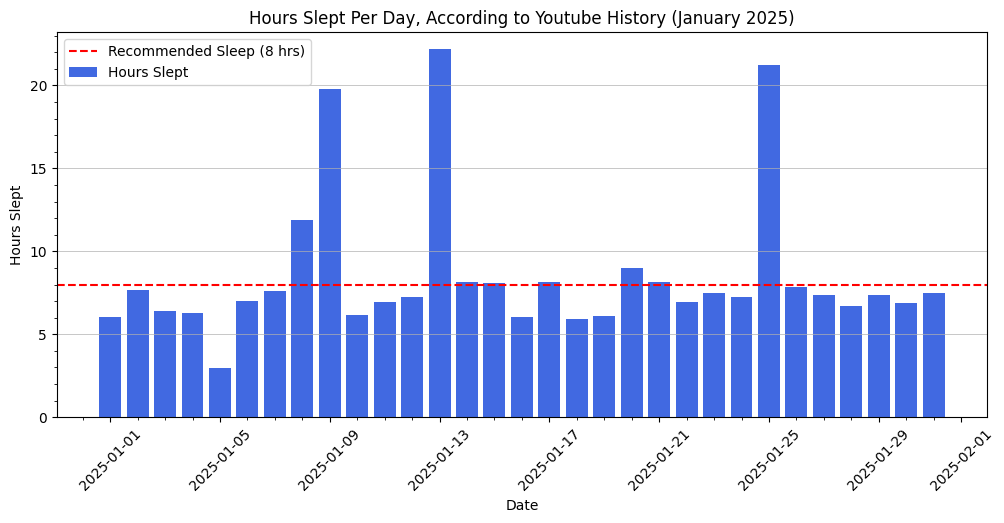

In [ ]:
df_month = result_df[(result_df['date'] >= pd.to_datetime(start_date).date()) &
                 (result_df['date'] < pd.to_datetime(end_date).date())]

plt.figure(figsize=(12, 5))
plt.bar(df_month["date"], df_month["hours_slept"], color="royalblue", label="Hours Slept")
plt.axhline(y=8, color="r", linestyle="--", label="Recommended Sleep (8 hrs)")  # Do we want a line for 8 hours?

plt.xlabel("Date")
plt.ylabel("Hours Slept")
plt.title("Hours Slept Per Day, According to Youtube History (January 2025)")
plt.xticks(rotation=45)
plt.legend()

max_hours = df_month["hours_slept"].max()
plt.ylim(0, max_hours + 1)
plt.grid(True, which="major", axis = "y", linewidth=0.5)
plt.minorticks_on()

plt.show()

In [ ]:
filtered_df['startDate'] = pd.to_datetime(filtered_df['startDate'])
filtered_df['endDate'] = pd.to_datetime(filtered_df['endDate'])

# Any sleep starting recorded before noon is probably from previous day (deals with Health app counting phone pick ups as stopping and starting sleep again, in case phone gets picked up before alarm)
filtered_df['sleep_date'] = filtered_df['startDate'].apply(lambda x: x.date() if x.hour < 12 else (x - pd.Timedelta(days=1)).date())

# Calculate the sleep duration for each record (in hours)
filtered_df['sleep_time'] = (filtered_df['endDate'] - filtered_df['startDate']).dt.total_seconds() / 3600

# Group by sleep date and aggregate the required information
health_df = filtered_df.groupby('sleep_date').agg(
    total_sleep_time=('sleep_time', 'sum'),
    bedtime=('startDate', 'min'),
    wake_up_time=('endDate', 'max')
).reset_index()

# Show the result
print(health_df)

      sleep_date  total_sleep_time                   bedtime  \
0     2017-10-04          3.248611 2017-10-04 02:35:20-05:00   
1     2018-07-25         18.633056 2018-07-26 23:27:00-05:00   
2     2018-07-26         23.966389 2018-07-27 18:17:00-05:00   
3     2018-07-29         22.966389 2018-07-30 18:01:00-05:00   
4     2018-07-30         23.133056 2018-07-31 18:02:00-05:00   
...          ...               ...                       ...   
1282  2024-07-03          9.501944 2024-07-03 03:15:17-05:00   
1283  2024-07-04          2.920000 2024-07-04 03:46:59-05:00   
1284  2024-07-05          1.999722 2024-07-05 04:50:28-05:00   
1285  2024-07-06          0.015000 2024-07-07 23:58:57-05:00   
1286  2024-07-08          5.096389 2024-07-08 02:21:03-05:00   

                  wake_up_time  
0    2017-10-04 07:12:27-05:00  
1    2018-07-27 08:46:00-05:00  
2    2018-07-28 06:16:00-05:00  
3    2018-07-31 05:34:00-05:00  
4    2018-08-01 05:36:00-05:00  
...                        ...  


<ipython-input-117-bfe9f02eaab6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['startDate'] = pd.to_datetime(filtered_df['startDate'])
<ipython-input-117-bfe9f02eaab6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['endDate'] = pd.to_datetime(filtered_df['endDate'])
<ipython-input-117-bfe9f02eaab6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

In [ ]:
start_date = '2024-01-01'
end_date = '2024-02-01'

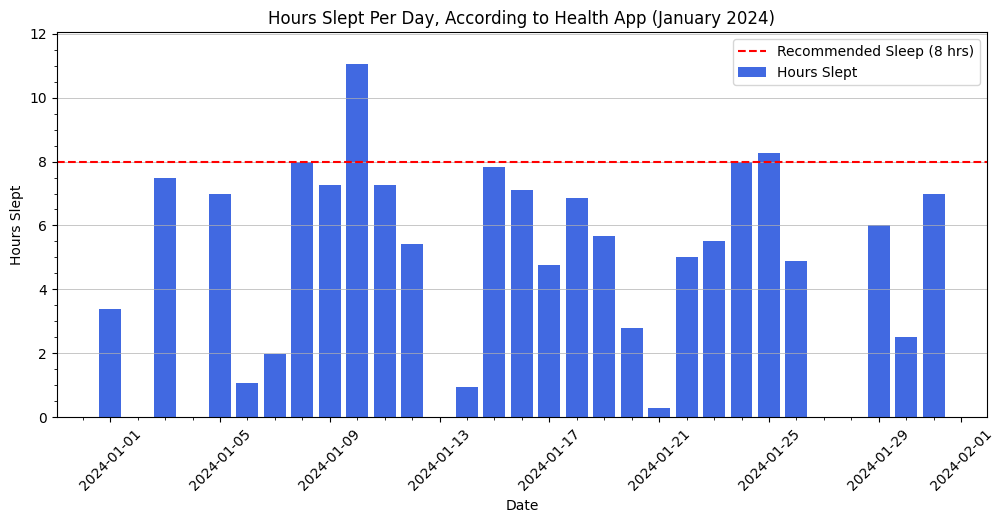

In [ ]:
df_month = health_df[(health_df['sleep_date'] >= pd.to_datetime(start_date).date()) &
                 (health_df['sleep_date'] < pd.to_datetime(end_date).date())]
plt.figure(figsize=(12, 5))
plt.bar(df_month["sleep_date"], df_month["total_sleep_time"], color="royalblue", label="Hours Slept")
plt.axhline(y=8, color="r", linestyle="--", label="Recommended Sleep (8 hrs)")

plt.xlabel("Date")
plt.ylabel("Hours Slept")
plt.title("Hours Slept Per Day, According to Health App (January 2024)")
plt.xticks(rotation=45)
plt.legend()

max_hours = df_month["total_sleep_time"].max()
plt.ylim(0, max_hours + 1)
plt.grid(True, which="major", axis = "y", linewidth=0.5)
plt.minorticks_on()

plt.show()

In [ ]:
# No overlap in health and YouTube data ^ so comapared previous year's month. Data quality is low